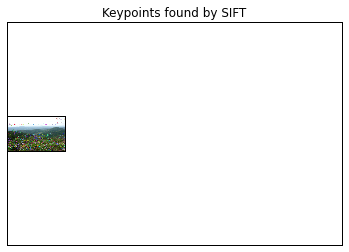

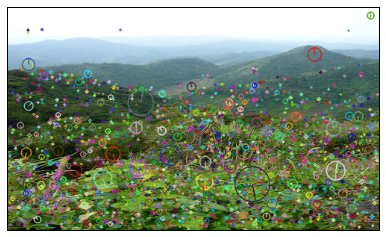

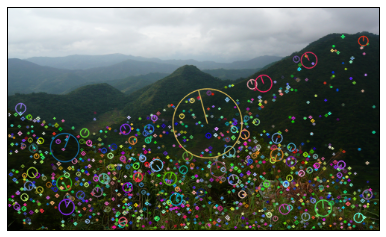

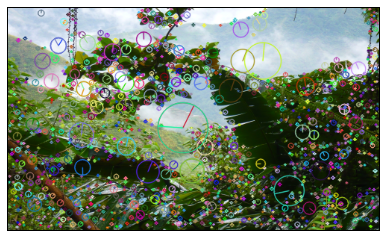

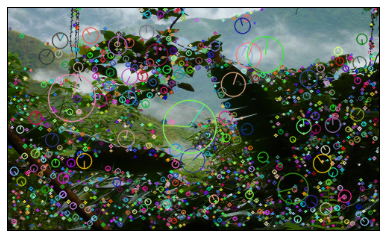

[array([[ 30.,  63.,  15., ...,   0.,   0.,   5.],
       [  5.,  50.,  62., ...,  12.,   3.,   0.],
       [ 99.,   7.,  11., ...,   8.,   6.,   5.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)]
[  30.   63.   15.   80.   64.    1.    2.    7.   33.  105.   77.   11.
    0.    0.    0.    2.   96.  124.   12.    2.    0.    0.    0.    1.
   73.  113.    7.    1.    0.    0.    0.    6.    9.    5.    1.   16.
   20.   16.   53.   69.   38.   51.   28.    5.   14.   66.   29.   15.
  125.   77.    5.    1.    1.    5.    2.   41.  125.   10.    0.    0.
    0.    0.    0.   89.    8.    4.   16.    6.    3.   15.   34.   89.
   18.    4.   16.   13.   25.  124.   44.   32.  125.   12.    0.    0.
    1.   16.   24.   96.  125.   26.    0.    0.    0.    0.    0.   57.
    7.   22.   49.   41.   10.    1.    1.    8.   67.   18.   41.   17.
    5.    4.

AttributeError: 'numpy.float32' object has no attribute 'n'

In [3]:
import cv2    
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

import os
def get_imlist(path):
    return [[os.path.join(path,f) for f in os.listdir(path) if (f.endswith('.jpg') or f.endswith('.png'))]]

def createVocabulary(image, ucmap):
    if len(image.shape)==3 :
        b,g,r = cv2.split(image)
        image = cv2.merge([r,g,b])
    imgplot=plt.imshow(image, ucmap)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.rcParams['figure.figsize'] = 17, 4
filenames=get_imlist('F:\jpg')
filenames=np.array(filenames)

descriptor_mat=[]
sift=cv2.SIFT()
fig = plt.figure()
plt.title('Keypoints found by SIFT')
plt.xticks(())
plt.yticks(())
for image_no in xrange(5):
    img=cv2.imread(filenames[0][image_no])
    img=cv2.resize(img, (500, 300), interpolation=cv2.INTER_AREA)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=cv2.equalizeHist(gray)
    kp, des=sift.detectAndCompute(gray,None)
    descriptor_mat.append(des)
    img=cv2.drawKeypoints(img, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    fig.add_subplot(1, 5, image_no+1)
    createVocabulary(img, None)
    plt.show()
    
class Point:
    def __init__(self, coords):
        self.coords = coords
        self.n = len(coords)
    def __repr__(self):
        return str(self.coords)
        
def getDistance(a, b):    
    ret = reduce(lambda x,y: x + pow((a.coords[y]-b.coords[y]), 2),range(a.n),0.0)
    return math.sqrt(ret)
        
        
class Cluster:
    def __init__(self, points):
       
        self.points = points
        
        print(points)
        print(points[0][0])
        self.n = points[0][0][0].n
        
        for p in points:
            if p.n != self.n: raise Exception("incorrect dimension")
            
        self.centroid = self.calculateCentroid()
    
    def update(self, points):
        old_centroid = self.centroid
        self.points = points
        self.centroid = self.calculateCentroid()
    
    def calculateCentroid(self):
        numPoints = len(self.points)
        coords = [p.coords for p in self.points]
        unzipped = zip(*coords)
        centroid_coords = [math.fsum(dList)/numPoints for dList in unzipped]
        
        return Point(centroid_coords)

def makeDataPoint(i):
    p = Point(i)
    return p

def myKMeans(k,points):
    random.seed(11112014)
    initial = random.sample(points, k)
    clus = [Cluster([p]) for p in initial]
    loopCounter = 0
    lists = [ [] for c in clusters]
    clusterCount = len(clusters)
    loopCounter += 1
    for p in points:
        smallest_distance = getDistance(p, clusters[0].centroid)    
        clusterIndex = 0    
        for i in range(clusterCount - 1):
            distance = getDistance(p, clusters[i+1].centroid)
            if distance < smallest_distance:
                smallest_distance = distance
                clusterIndex = i+1            
        lists[clusterIndex].append(p)
        biggest_shift = 0.0
    for i in range(clusterCount):
        clusters[i].update(lists[i])   
    return clusters

cluster_centers=myKMeans(5, descriptor_mat)
print('hello')

def getbof():
    training=[]
    filenames=get_imlist('F:\jpg')
    filenames=np.array(filenames)
    descr=[]
    for image_name in filenames[0]:
        img=cv2.imread(image_name)
        gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray=cv2.resize(gray, (300, 200), interpolation=cv2.INTER_AREA)
        gray=cv2.equalizeHist(gray)
        _, des=sift.detectAndCompute(gray, None)
        descr.append(des)
    training.append(descr)
    return training